### Predicting the Length of Stay in Hospital among Schizophrenic and Other Psychotic Disorders Patients Using Machine Learning

**Introduction**

The length of hospital stay (LOS) is a critical measure in healthcare, particularly in psychiatry, as it impacts both the quality of care and resource allocation. The length of stay is defined as: 	
**"The total number of patient days at an acute level and/or other than acute care level (excluding leave of absence days)"**.
Prolonged hospitalizations among patients with schizophrenia and psychotic disorders can increase healthcare costs and affect patients' mental health outcomes. This project aims to apply machine learning techniques to predict the LOS of such patients, enabling healthcare professionals to manage resources and develop personalized discharge plans proactively.

In [352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot

In [353]:
# Loading the dataset
file_path = '/Users/shubray/Desktop/Hospital_Inpatient_Discharges.csv'

In [354]:
data = pd.read_csv(file_path, low_memory=False)

In [355]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135260 entries, 0 to 2135259
Data columns (total 33 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Hospital Service Area                object 
 1   Hospital County                      object 
 2   Operating Certificate Number         float64
 3   Permanent Facility Id                float64
 4   Facility Name                        object 
 5   Age Group                            object 
 6   Zip Code - 3 digits                  object 
 7   Gender                               object 
 8   Race                                 object 
 9   Ethnicity                            object 
 10  Length of Stay                       object 
 11  Type of Admission                    object 
 12  Patient Disposition                  object 
 13  Discharge Year                       int64  
 14  CCSR Diagnosis Code                  object 
 15  CCSR Diagnosis Description      

In [356]:
# Missing data percentage
print(data.isnull().sum()/data.count()*100)

Hospital Service Area                    0.244783
Hospital County                          0.244783
Operating Certificate Number             0.313023
Permanent Facility Id                    0.244783
Facility Name                            0.000000
Age Group                                0.000000
Zip Code - 3 digits                      1.921037
Gender                                   0.000000
Race                                     0.000000
Ethnicity                                0.000000
Length of Stay                           0.000000
Type of Admission                        0.000000
Patient Disposition                      0.000000
Discharge Year                           0.000000
CCSR Diagnosis Code                      0.000000
CCSR Diagnosis Description               0.000000
CCSR Procedure Code                     37.574715
CCSR Procedure Description              37.574715
APR DRG Code                             0.000000
APR DRG Description                      0.000000


In [357]:
# Drop irrelevant columns and excessive missing values
data = data.drop(['Birth Weight','Payment Typology 2','Payment Typology 3','CCSR Procedure Code', 'Operating Certificate Number', 'Emergency Department Indicator'], axis=1)

In [358]:
data.head()

,Hospital Service Area,Hospital County,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,...,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Total Charges,Total Costs
0,New York City,Bronx,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,70 or Older,104,M,Other Race,Spanish/Hispanic,27,...,MAJOR RESPIRATORY INFECTIONS AND INFLAMMATIONS,4,DISEASES AND DISORDERS OF THE RESPIRATORY SYSTEM,3,Major,Extreme,Medical,Medicare,320922.43,60241.34
1,New York City,Bronx,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,50 to 69,104,F,White,Not Span/Hispanic,4,...,"MULTIPLE SCLEROSIS, OTHER DEMYELINATING DISEAS...",1,DISEASES AND DISORDERS OF THE NERVOUS SYSTEM,2,Moderate,Minor,Medical,Private Health Insurance,61665.22,9180.69
2,New York City,Bronx,1168.0,Montefiore Medical Center-Wakefield Hospital,18 to 29,104,F,Other Race,Spanish/Hispanic,2,...,CESAREAN SECTION WITHOUT STERILIZATION,14,"PREGNANCY, CHILDBIRTH AND THE PUERPERIUM",1,Minor,Minor,Surgical,Medicaid,42705.34,11366.50
3,New York City,Bronx,3058.0,Montefiore Med Center - Jack D Weiler Hosp of ...,70 or Older,104,M,Other Race,Spanish/Hispanic,5,...,KIDNEY AND URINARY TRACT INFECTIONS,11,DISEASES AND DISORDERS OF THE KIDNEY AND URINA...,3,Major,Major,Medical,Medicare,72700.17,12111.75
4,New York City,Bronx,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,50 to 69,104,F,Black/African American,Not Span/Hispanic,3,...,OTHER DISORDERS OF NERVOUS SYSTEM,1,DISEASES AND DISORDERS OF THE NERVOUS SYSTEM,2,Moderate,Minor,Medical,Medicare,55562.51,8339.72


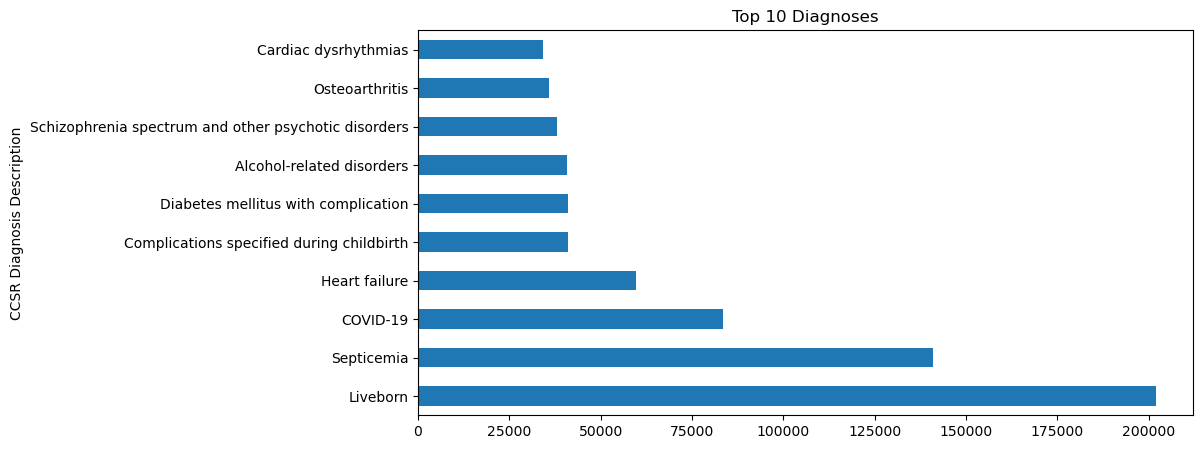

In [359]:
# plotting top 10 diagnosis
data['CCSR Diagnosis Description'].value_counts().head(10).plot(kind='barh', title='Top 10 Diagnoses', figsize=(10,5));

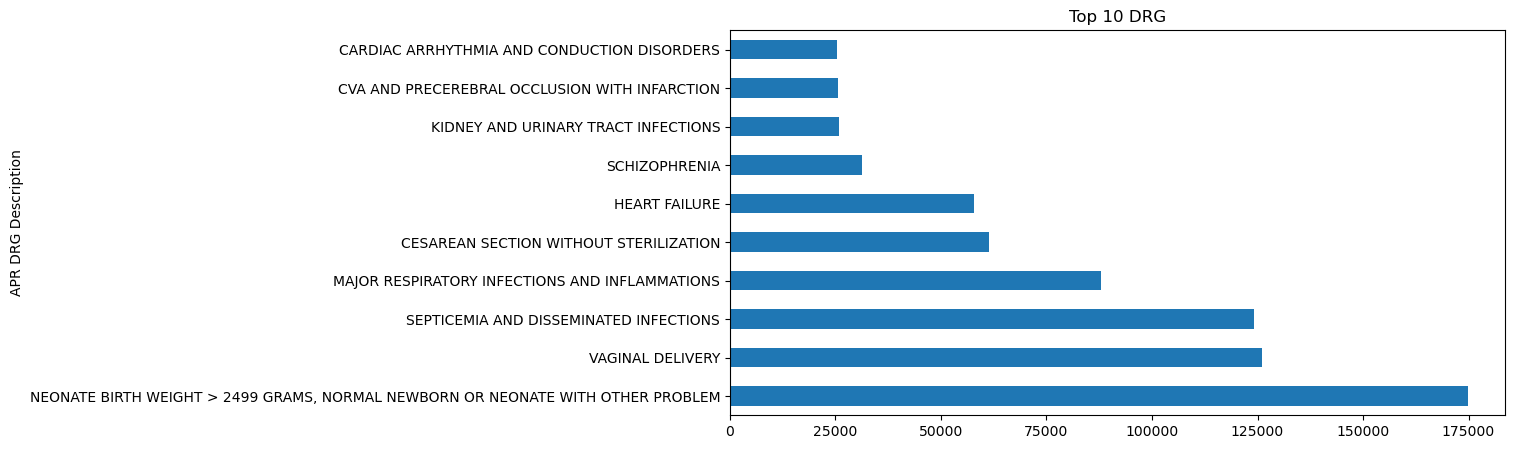

In [360]:
# plotting top 10 diagnosis related group 
data['APR DRG Description'].value_counts().head(10).plot(kind='barh', title='Top 10 DRG', figsize=(10,5));

In [361]:
# Selecting rows where the 'CCSR Diagnosis Description' is 'Schizophrenia and other psychotic disorders'
sch_data = data[data['CCSR Diagnosis Description'] == 'Schizophrenia spectrum and other psychotic disorders']

In [362]:
# Displaying the first few rows of the filtered dataset
sch_data.head()

,Hospital Service Area,Hospital County,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,...,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Total Charges,Total Costs
32,New York City,Kings,1294.0,Coney Island Hospital,30 to 49,NaN,M,Other Race,Unknown,24,...,SCHIZOPHRENIA,19,MENTAL DISEASES AND DISORDERS,2,Moderate,Moderate,Medical,Medicare,97625.72,44612.90
147,New York City,Manhattan,1438.0,Bellevue Hospital Center,50 to 69,OOS,M,Black/African American,Unknown,1,...,SCHIZOPHRENIA,19,MENTAL DISEASES AND DISORDERS,2,Moderate,Minor,Medical,Self-Pay,6051.00,3479.83
152,New York City,Bronx,1165.0,Jacobi Medical Center,18 to 29,104,M,Other Race,Not Span/Hispanic,1,...,MAJOR DEPRESSIVE DISORDERS AND OTHER OR UNSPEC...,19,MENTAL DISEASES AND DISORDERS,2,Moderate,Minor,Medical,Medicaid,6457.61,3832.84
183,New York City,Kings,1692.0,Woodhull Medical & Mental Health Center,30 to 49,112,M,Black/African American,Not Span/Hispanic,1,...,MAJOR DEPRESSIVE DISORDERS AND OTHER OR UNSPEC...,19,MENTAL DISEASES AND DISORDERS,2,Moderate,Minor,Medical,Medicaid,5504.58,3751.86
200,Hudson Valley,Rockland,776.0,Montefiore Nyack,50 to 69,109,M,Black/African American,Not Span/Hispanic,9,...,SCHIZOPHRENIA,19,MENTAL DISEASES AND DISORDERS,2,Moderate,Minor,Medical,Private Health Insurance,54640.76,14877.09


In [363]:
sch_data.reset_index(drop=True, inplace=True)
sch_data.head()

,Hospital Service Area,Hospital County,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,...,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Total Charges,Total Costs
0,New York City,Kings,1294.0,Coney Island Hospital,30 to 49,NaN,M,Other Race,Unknown,24,...,SCHIZOPHRENIA,19,MENTAL DISEASES AND DISORDERS,2,Moderate,Moderate,Medical,Medicare,97625.72,44612.90
1,New York City,Manhattan,1438.0,Bellevue Hospital Center,50 to 69,OOS,M,Black/African American,Unknown,1,...,SCHIZOPHRENIA,19,MENTAL DISEASES AND DISORDERS,2,Moderate,Minor,Medical,Self-Pay,6051.00,3479.83
2,New York City,Bronx,1165.0,Jacobi Medical Center,18 to 29,104,M,Other Race,Not Span/Hispanic,1,...,MAJOR DEPRESSIVE DISORDERS AND OTHER OR UNSPEC...,19,MENTAL DISEASES AND DISORDERS,2,Moderate,Minor,Medical,Medicaid,6457.61,3832.84
3,New York City,Kings,1692.0,Woodhull Medical & Mental Health Center,30 to 49,112,M,Black/African American,Not Span/Hispanic,1,...,MAJOR DEPRESSIVE DISORDERS AND OTHER OR UNSPEC...,19,MENTAL DISEASES AND DISORDERS,2,Moderate,Minor,Medical,Medicaid,5504.58,3751.86
4,Hudson Valley,Rockland,776.0,Montefiore Nyack,50 to 69,109,M,Black/African American,Not Span/Hispanic,9,...,SCHIZOPHRENIA,19,MENTAL DISEASES AND DISORDERS,2,Moderate,Minor,Medical,Private Health Insurance,54640.76,14877.09


In [364]:
sch_data.dtypes

Hospital Service Area                   object
Hospital County                         object
Permanent Facility Id                  float64
Facility Name                           object
Age Group                               object
Zip Code - 3 digits                     object
Gender                                  object
Race                                    object
Ethnicity                               object
Length of Stay                          object
Type of Admission                       object
Patient Disposition                     object
Discharge Year                           int64
CCSR Diagnosis Code                     object
CCSR Diagnosis Description              object
CCSR Procedure Description              object
APR DRG Code                             int64
APR DRG Description                     object
APR MDC Code                             int64
APR MDC Description                     object
APR Severity of Illness Code             int64
APR Severity 

In [365]:
# Numerical variables in the Schizophrenia spectrum and other psychotic disorders dataset
num_features = [feature for feature in sch_data.columns if sch_data[feature].dtypes != 'O']
print('Number of numerical variables: ', len(num_features))
print('Numerical Variables Column: ',num_features)

Number of numerical variables:  7
Numerical Variables Column:  ['Permanent Facility Id', 'Discharge Year', 'APR DRG Code', 'APR MDC Code', 'APR Severity of Illness Code', 'Total Charges', 'Total Costs']


In [366]:
# Categorical Variables
cat_features = [feature for feature in sch_data.columns if sch_data[feature].dtypes == 'O']
print('Number of categorical variables: ', len(cat_features))
print('Categorical variables column name:',cat_features)

Number of categorical variables:  20
Categorical variables column name: ['Hospital Service Area', 'Hospital County', 'Facility Name', 'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race', 'Ethnicity', 'Length of Stay', 'Type of Admission', 'Patient Disposition', 'CCSR Diagnosis Code', 'CCSR Diagnosis Description', 'CCSR Procedure Description', 'APR DRG Description', 'APR MDC Description', 'APR Severity of Illness Description', 'APR Risk of Mortality', 'APR Medical Surgical Description', 'Payment Typology 1']


In [367]:
# Select numerical columns in sch_data
num_col_sch = sch_data.select_dtypes(include=['int64', 'float64'])

# Check for missing values in numerical columns
missing_values_num_sch = num_col_sch.isnull().sum()

# Filter columns that have missing values
missing_values_num_sch = missing_values_num_sch[missing_values_num_sch > 0]

# Display the result
print("Numeric columns with missing values in schizophrenia dataset:")
print(missing_values_num_sch)

Numeric columns with missing values in schizophrenia dataset:
Permanent Facility Id    73
dtype: int64


In [368]:
# Select categorical columns in sch_data
cat_col_sch = sch_data.select_dtypes(include=['object', 'category'])

# Check for missing values in categorical columns
missing_values_cat_sch = cat_col_sch.isnull().sum()

# Filter columns that have missing values
missing_values_cat_sch = missing_values_cat_sch[missing_values_cat_sch > 0]

# Display the result
print("Categorical columns with missing values in schizophrenia dataset:")
print(missing_values_cat_sch)

Categorical columns with missing values in schizophrenia dataset:
Hospital Service Area            73
Hospital County                  73
Zip Code - 3 digits            1195
CCSR Procedure Description    17157
dtype: int64


## Mapping categorical values to numerical labels relevant to LOS

In [370]:
gender_mapping_dict = {
    1: 'M',  # Male
    2: 'F',  # Female
    3: 'U'   # Unknown
}

print("Gender Mapping:")
print(gender_mapping_dict)

Gender Mapping:
{1: 'M', 2: 'F', 3: 'U'}


In [371]:
age_group_mapping_dict = {
    1: '0 to 17',
    2: '18 to 29',
    3: '30 to 49',
    4: '50 to 69',
    5: '70 or Older'
}

print("Age Group Mapping:")
print(age_group_mapping_dict)

Age Group Mapping:
{1: '0 to 17', 2: '18 to 29', 3: '30 to 49', 4: '50 to 69', 5: '70 or Older'}


In [372]:
race_mapping_dict = {
    1: 'Other Race',
    2: 'Black/African American',
    3: 'White',
    4: 'Multi-racial'
}

print("Race Mapping:")
print(race_mapping_dict)

Race Mapping:
{1: 'Other Race', 2: 'Black/African American', 3: 'White', 4: 'Multi-racial'}


In [373]:
ethnicity_mapping_dict = {
    1: 'Unknown',
    2: 'Not Span/Hispanic',
    3: 'Spanish/Hispanic',
    4: 'Multi-ethnic'
}

print("Ethnicity Mapping:")
print(ethnicity_mapping_dict)

Ethnicity Mapping:
{1: 'Unknown', 2: 'Not Span/Hispanic', 3: 'Spanish/Hispanic', 4: 'Multi-ethnic'}


In [374]:
apr_drg_description_mapping_dict = {
    1: 'SCHIZOPHRENIA',
    2: 'MAJOR DEPRESSIVE DISORDERS AND OTHER OR UNSPECIFIED PSYCHOSES',
    3: 'OTHER MENTAL HEALTH DISORDERS',
    4: 'MENTAL ILLNESS DIAGNOSIS WITH O.R. PROCEDURE',
    5: 'HIV WITH MAJOR HIV RELATED CONDITION',
    6: 'ORGANIC MENTAL HEALTH DISTURBANCES',
    7: 'DISORDERS OF PERSONALITY AND IMPULSE CONTROL',
    8: 'HIV WITH MULTIPLE MAJOR HIV RELATED CONDITIONS'
}

print("APR DRG Description Mapping:")
print(apr_drg_description_mapping_dict)

APR DRG Description Mapping:
{1: 'SCHIZOPHRENIA', 2: 'MAJOR DEPRESSIVE DISORDERS AND OTHER OR UNSPECIFIED PSYCHOSES', 3: 'OTHER MENTAL HEALTH DISORDERS', 4: 'MENTAL ILLNESS DIAGNOSIS WITH O.R. PROCEDURE', 5: 'HIV WITH MAJOR HIV RELATED CONDITION', 6: 'ORGANIC MENTAL HEALTH DISTURBANCES', 7: 'DISORDERS OF PERSONALITY AND IMPULSE CONTROL', 8: 'HIV WITH MULTIPLE MAJOR HIV RELATED CONDITIONS'}


In [375]:
apr_risk_of_mortality_mapping_dict = {
    1: 'Minor',
    2: 'Moderate',
    3: 'Major',
    4: 'Extreme'
}

print("APR Risk of Mortality Mapping:")
print(apr_risk_of_mortality_mapping_dict)

APR Risk of Mortality Mapping:
{1: 'Minor', 2: 'Moderate', 3: 'Major', 4: 'Extreme'}


In [376]:
apr_severity_of_illness_mapping_dict = {
    1: 'Minor',
    2: 'Moderate',
    3: 'Major',
    4: 'Extreme'
}

print("APR Severity of Illness Description Mapping:")
print(apr_severity_of_illness_mapping_dict)

APR Severity of Illness Description Mapping:
{1: 'Minor', 2: 'Moderate', 3: 'Major', 4: 'Extreme'}


**Fill in the missing values**

In [378]:
# fill missing values in numerical columns with median
sch_data.loc[:, num_col_sch.columns] = num_col_sch.fillna(num_col_sch.median())

## Encoding Categorical Variables

In [380]:
# convert categorical variables into numerical and fill missing values
for label, content in sch_data.items():
    if not pd.api.types.is_numeric_dtype(content):  # Check if the column is not numeric
        # Use .loc to modify the DataFrame and fill in categorical codes
        sch_data.loc[:, label] = pd.Categorical(content).codes + 1  # Adding +1 to avoid negative values for NaN categories

In [381]:
sch_data.isna().sum()

Hospital Service Area                  0
Hospital County                        0
Permanent Facility Id                  0
Facility Name                          0
Age Group                              0
Zip Code - 3 digits                    0
Gender                                 0
Race                                   0
Ethnicity                              0
Length of Stay                         0
Type of Admission                      0
Patient Disposition                    0
Discharge Year                         0
CCSR Diagnosis Code                    0
CCSR Diagnosis Description             0
CCSR Procedure Description             0
APR DRG Code                           0
APR DRG Description                    0
APR MDC Code                           0
APR MDC Description                    0
APR Severity of Illness Code           0
APR Severity of Illness Description    0
APR Risk of Mortality                  0
APR Medical Surgical Description       0
Payment Typology

### Exploratory Data Analysis

In [383]:
# Select columns that are relevant for Schizophrenia and Length of Stay
rel_col = [
    'Length of Stay','Age Group','Gender','Race', 'Ethnicity','APR Severity of Illness Description','APR DRG Description','APR Risk of Mortality'
]

In [384]:
# Create a subset DataFrame with only the relevant columns
sch_data_rel = sch_data[rel_col]

In [385]:
sch_data_rel.head()

,Length of Stay,Age Group,Gender,Race,Ethnicity,APR Severity of Illness Description,APR DRG Description,APR Risk of Mortality
0,38,3,2,3,4,4,8,4
1,1,4,2,1,4,4,8,3
2,1,2,2,3,2,4,4,3
3,1,3,2,1,2,4,4,3
4,110,4,2,1,2,4,8,3


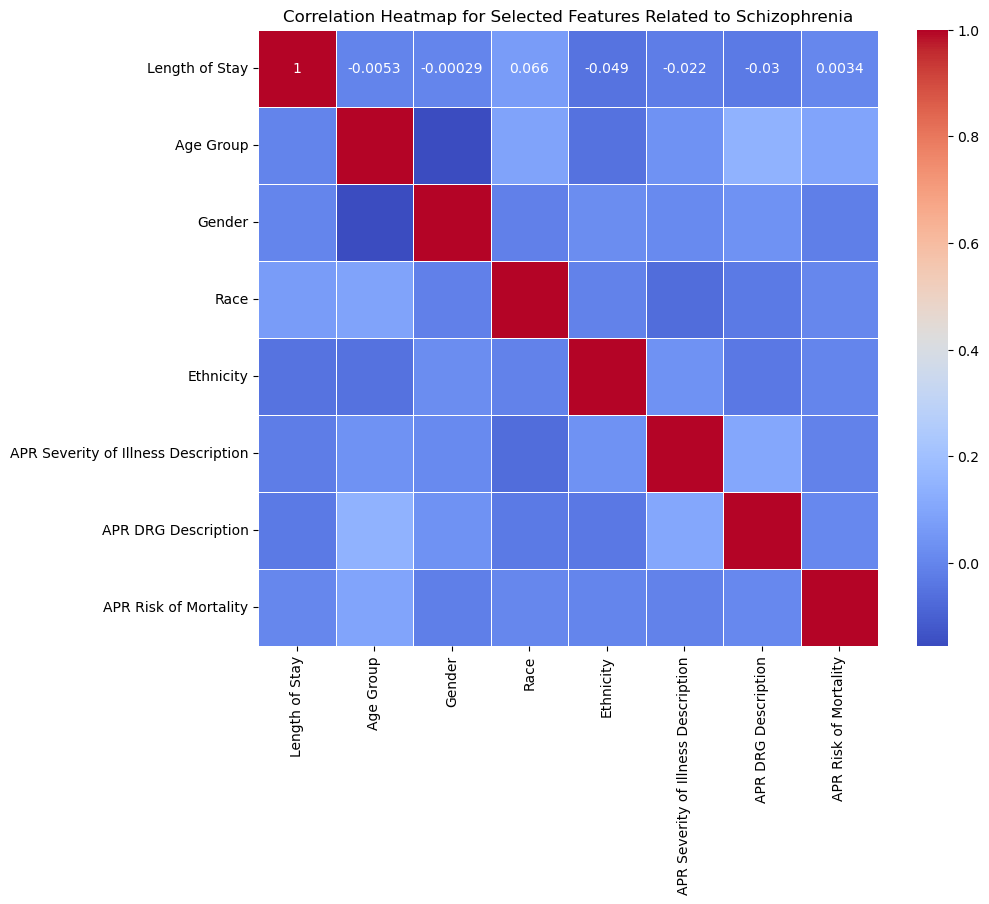

In [386]:
# Calculate the correlation matrix
corr_matrix = sch_data_rel.corr()

# Plot the heatmap for the selected columns
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap for Selected Features Related to Schizophrenia")
plt.show()

This heatmap shows that there is very little correlation between Length of Stay and the other variables, except for some slight relationships between features like APR DRG Description and APR Risk of Mortality. For predicting Length of Stay, the correlations indicate that these particular features may not be strong linear predictors, but non-linear relationships might still exist, which could be explored through other machine learning techniques. 

In [388]:
sch_data['Length of Stay']

0         38
1          1
2          1
3          1
4        110
        ... 
38025     13
38026      1
38027     34
38028     37
38029     26
Name: Length of Stay, Length: 38030, dtype: object

In [389]:
# Find the maximum Length of Stay for schizophrenia patients
max_stay = sch_data['Length of Stay'].max()

print(f"The maximum Length of Stay for Schizophrenia and other psychotic disorders is: {max_stay} days")

The maximum Length of Stay for Schizophrenia and other psychotic disorders is: 120 days


In [390]:
from collections import Counter

In [391]:
Counter(sch_data['Length of Stay'])

Counter({88: 2174,
         99: 2122,
         1: 2080,
         110: 1944,
         77: 1871,
         2: 1761,
         27: 1659,
         24: 1640,
         26: 1633,
         13: 1590,
         66: 1487,
         33: 1429,
         55: 1381,
         44: 1245,
         28: 1242,
         29: 1005,
         30: 866,
         31: 750,
         32: 748,
         35: 704,
         34: 686,
         36: 610,
         37: 475,
         38: 394,
         39: 374,
         41: 373,
         42: 359,
         40: 345,
         45: 271,
         43: 269,
         25: 244,
         47: 216,
         46: 216,
         50: 212,
         49: 202,
         51: 199,
         48: 181,
         57: 156,
         58: 148,
         53: 145,
         52: 141,
         56: 131,
         59: 125,
         54: 123,
         60: 97,
         63: 84,
         65: 83,
         64: 83,
         61: 82,
         62: 81,
         73: 69,
         67: 67,
         70: 66,
         72: 64,
         81: 53,
      

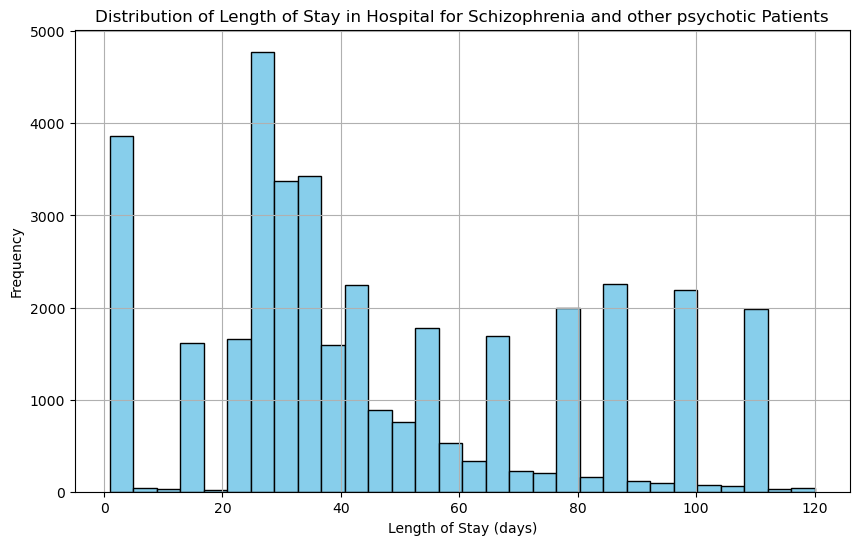

In [392]:
# Create a histogram of Length of Stay in the schizophrenia dataset
plt.figure(figsize=(10,6))
plt.hist(sch_data['Length of Stay'], bins=30, edgecolor='black', color='skyblue')
plt.title('Distribution of Length of Stay in Hospital for Schizophrenia and other psychotic Patients')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


This visualization provides useful insights into how long patients with these conditions typically remain in the hospital. The X-axis represents the number of days patients with schizophrenia and other psychotic disorders stayed in the hospital. The length of stay ranges from 0 to over 120 days, grouped into bins. The Y-axis shows the number of patients (or occurrences) for each bin of days in the X-axis. It represents the frequency of patients staying for a certain duration in the hospital. 

The histogram demonstrates that most patients with schizophrenia or psychotic disorders tend to stay in the hospital for around 20 to 40 days, with a gradual decrease in the number of patients as the length of stay increases. There are a few patients with stays extending beyond 100 days.

In [394]:
# the total count of patients in the schizophrenia dataset
total_patients = sch_data['Length of Stay'].count()
print("Total number of patients:", total_patients)

Total number of patients: 38030


/var/folders/1c/pk9x7gmj557585lf_03b7xtr0000gn/T/ipykernel_12771/677571942.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



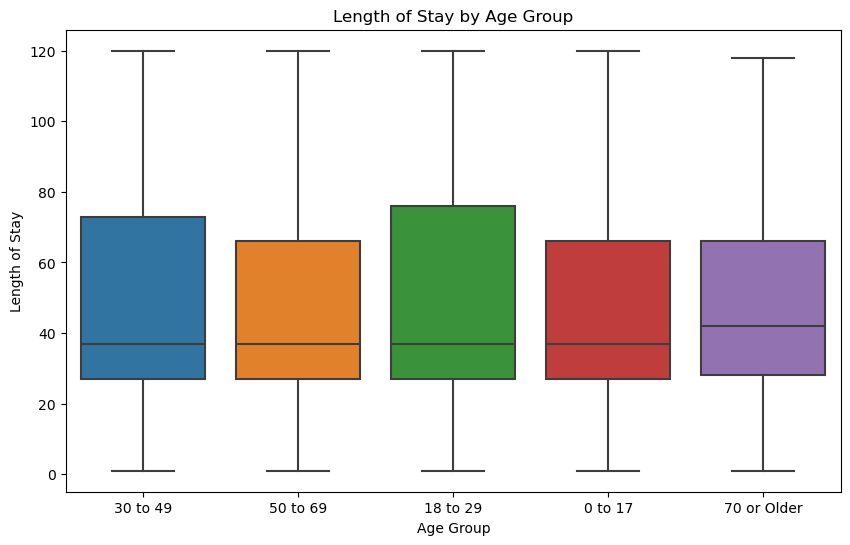

In [395]:
# Create a boxplot to show Age Group vs Length of Stay
# Map the numerical 'Age Group' values back to the original labels
sch_data_rel['Age Group'] = sch_data_rel['Age Group'].map(age_group_mapping_dict)

# Create the boxplot with proper labels
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age Group', y='Length of Stay', data=sch_data_rel)

# Add title and labels
plt.title("Length of Stay by Age Group")
plt.xlabel('Age Group')
plt.ylabel('Length of Stay')

# Show the plot
plt.show()


/var/folders/1c/pk9x7gmj557585lf_03b7xtr0000gn/T/ipykernel_12771/1282388426.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



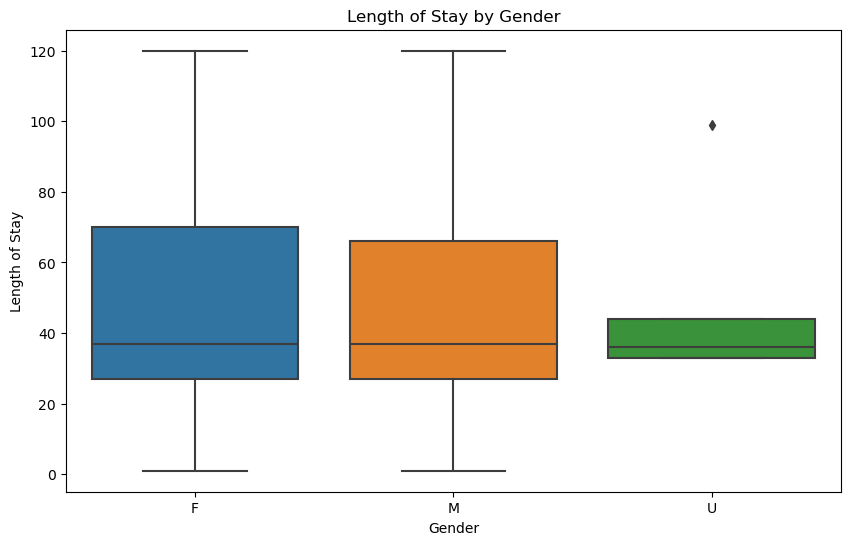

In [397]:
sch_data_rel['Gender'] = sch_data_rel['Gender'].map(gender_mapping_dict)

# Create the boxplot with proper labels
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Length of Stay', data=sch_data_rel)

# Add title and labels
plt.title("Length of Stay by Gender")
plt.xlabel('Gender')
plt.ylabel('Length of Stay')

# Show the plot
plt.show()

/var/folders/1c/pk9x7gmj557585lf_03b7xtr0000gn/T/ipykernel_12771/2406764050.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



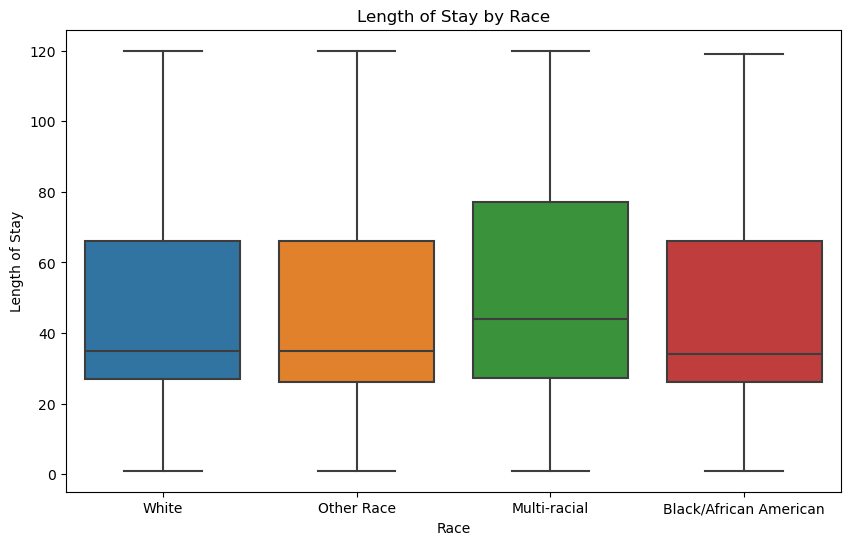

In [398]:
sch_data_rel['Race'] = sch_data_rel['Race'].map(race_mapping_dict)

# Create the boxplot with proper labels
plt.figure(figsize=(10, 6))
sns.boxplot(x='Race', y='Length of Stay', data=sch_data_rel)

# Add title and labels
plt.title("Length of Stay by Race")
plt.xlabel('Race')
plt.ylabel('Length of Stay')

# Show the plot
plt.show()

/var/folders/1c/pk9x7gmj557585lf_03b7xtr0000gn/T/ipykernel_12771/2902718080.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



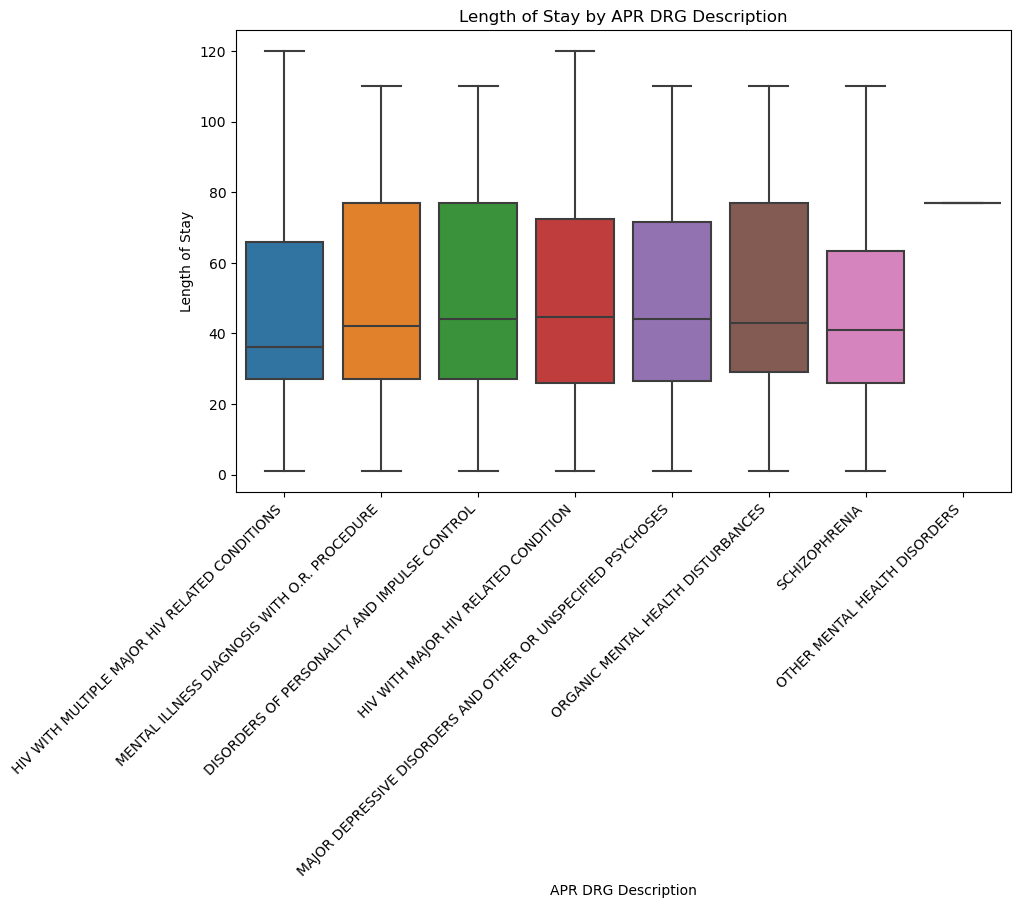

In [399]:
# Map the numerical 'APR DRG Description' values back to the original labels
sch_data_rel['APR DRG Description'] = sch_data_rel['APR DRG Description'].map(apr_drg_description_mapping_dict)

# Create the boxplot with proper labels
plt.figure(figsize=(10, 6))
sns.boxplot(x='APR DRG Description', y='Length of Stay', data=sch_data_rel)

# Add title and labels
plt.title("Length of Stay by APR DRG Description")
plt.xlabel('APR DRG Description')
plt.ylabel('Length of Stay')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

/var/folders/1c/pk9x7gmj557585lf_03b7xtr0000gn/T/ipykernel_12771/695571955.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



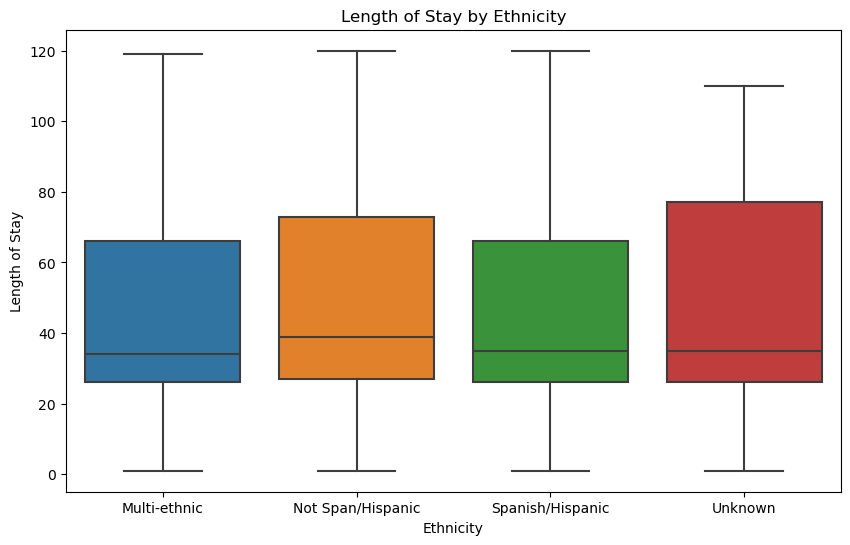

In [400]:
sch_data_rel['Ethnicity'] = sch_data_rel['Ethnicity'].map(ethnicity_mapping_dict)

# Create the boxplot with proper labels
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ethnicity', y='Length of Stay', data=sch_data_rel)

# Add title and labels
plt.title("Length of Stay by Ethnicity")
plt.xlabel('Ethnicity')
plt.ylabel('Length of Stay')

# Show the plot
plt.show()

/var/folders/1c/pk9x7gmj557585lf_03b7xtr0000gn/T/ipykernel_12771/3516437491.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



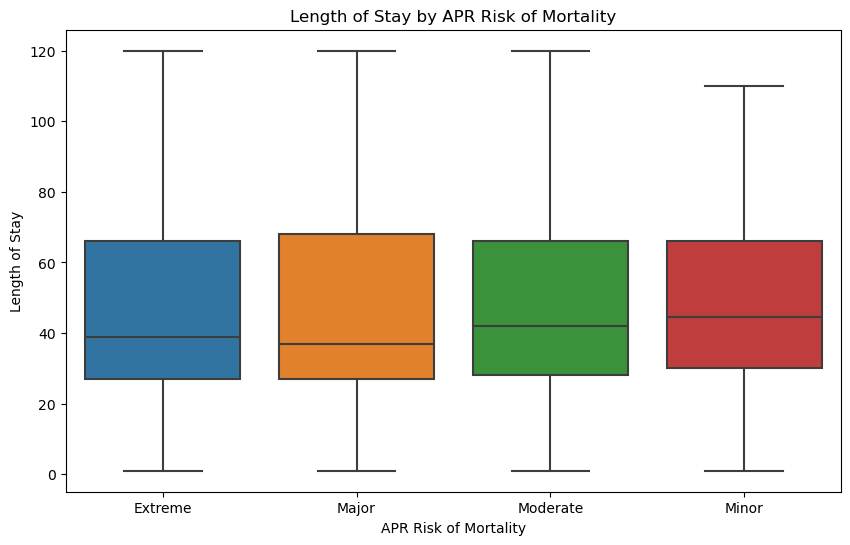

In [401]:
sch_data_rel['APR Risk of Mortality'] = sch_data_rel['APR Risk of Mortality'].map(apr_risk_of_mortality_mapping_dict)

# Create the boxplot with proper labels
plt.figure(figsize=(10, 6))
sns.boxplot(x='APR Risk of Mortality', y='Length of Stay', data=sch_data_rel)

# Add title and labels
plt.title("Length of Stay by APR Risk of Mortality")
plt.xlabel('APR Risk of Mortality')
plt.ylabel('Length of Stay')

# Show the plot
plt.show()

/var/folders/1c/pk9x7gmj557585lf_03b7xtr0000gn/T/ipykernel_12771/877671799.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



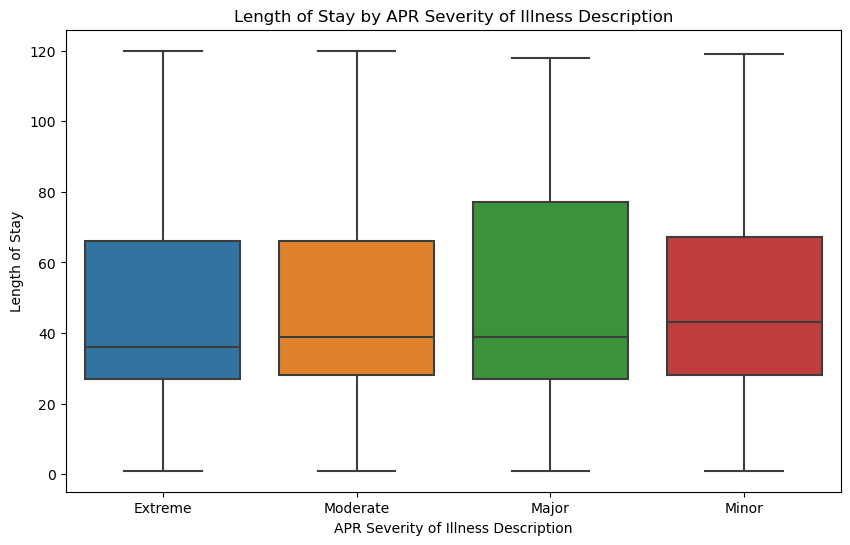

In [402]:
sch_data_rel['APR Severity of Illness Description'] = sch_data_rel['APR Severity of Illness Description'].map(apr_severity_of_illness_mapping_dict)

# Create the boxplot with proper labels
plt.figure(figsize=(10, 6))
sns.boxplot(x='APR Severity of Illness Description', y='Length of Stay', data=sch_data_rel)

# Add title and labels
plt.title("Length of Stay by APR Severity of Illness Description")
plt.xlabel('APR Severity of Illness Description')
plt.ylabel('Length of Stay')

# Show the plot
plt.show()